# Оператор Собеля

In [1]:
import cv2
import numpy as np

In [2]:
img = cv2.imread('lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
img.shape

(512, 512, 3)

In [8]:
img_gray.shape

(512, 512)

In [3]:
img.dtype

dtype('uint8')

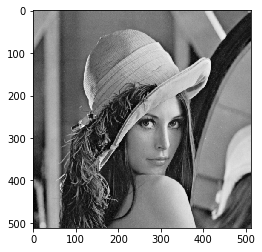

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img_gray, cmap='gray')

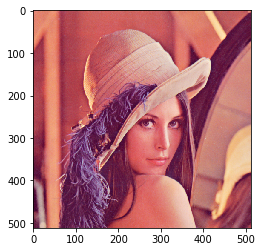

In [6]:
plt.imshow(img[..., ::-1])

## Оператор собеля для вычисления X и Y составляющих градиента

In [9]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
    
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

## Вычисляем градиенты по осям

In [10]:
grad_x = cv2.filter2D(img_gray, cv2.CV_32F, sobel_x)
grad_y = cv2.filter2D(img_gray, cv2.CV_32F, sobel_y)

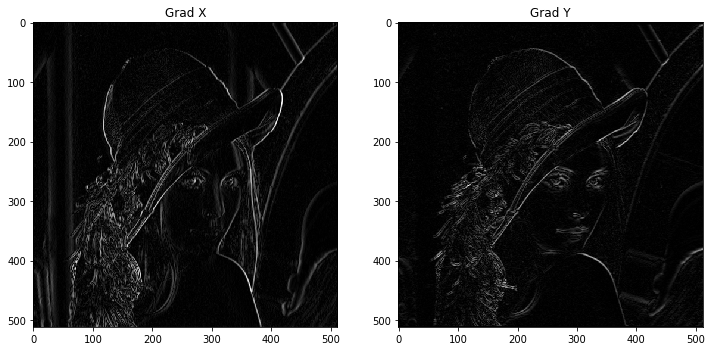

In [11]:
plt.figure(2, figsize=(12, 8))
plt.subplot(121)
plt.imshow(np.abs(grad_x)/np.max(np.abs(grad_x)), cmap='gray')
plt.title('Grad X')
plt.subplot(122)
plt.imshow(np.abs(grad_y)/np.max(np.abs(grad_y)), cmap='gray')
plt.title('Grad Y');

## Вычисляем суммарный градиент

In [12]:
grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
theta = np.arctan2(grad_y, grad_x)

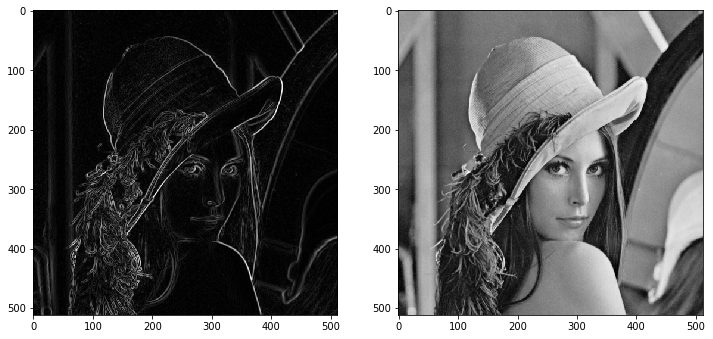

In [13]:
plt.figure(2, figsize=(12, 8))
plt.subplot(122)
plt.imshow(img_gray, cmap='gray')
plt.subplot(121)
plt.imshow(grad, cmap='gray')